## Read three files: X, triptype, header

In [5]:
# only 4 number of visit is trip type 14
# n_split minimum = 5

In [1]:
import pandas as pd
# load header(column name)
header = pd.read_csv('header.csv',header=None,sep='delimiter')
# change header from data frame to list 
header_list = header.values.tolist()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
import scipy.sparse as sci
x_test = sci.load_npz('X_test.npz')
x_train = sci.load_npz('X_train.npz')
y_train = pd.read_csv('y_train.csv',header=None)
y_test = pd.read_csv('y_test.csv',header=None)

In [3]:
# convert ytrain to list
import numpy as np
y_train = np.array(y_train[0])
y_train_list = y_train.tolist()

In [4]:
# remove duplicate 
y_train_class = list(set(y_train))
y_train_class = [str(y) for y in y_train_class]

In [5]:
y_test = np.array(y_test[0])

## Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() #fully grow
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
import numpy as np
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print('Fully grown tree:')
print('train score', train_score)
print('test score', test_score)

Fully grown tree:
train score 0.9937180997251669
test score 0.5777283433656111


In [10]:
importance = clf.feature_importances_
# sort the feature importance
idx_sorted = np.argsort(importance)[::-1]
importance_sorted = [header_list[i] for i in idx_sorted]

#### Plot the tree

In [11]:
import sklearn.tree
# contrain the tree depth in order to plot
clf_plot = DecisionTreeClassifier(max_depth=10)
clf_plot.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
y_train_plot = [str(d) for d in y_train_list]

In [13]:
# from sklearn import tree
# dot_data = tree.export_graphviz(clf_plot, out_file=None,
#                      feature_names=header_list,
#                      class_names=y_train_plot,
#                      filled=True,rounded = True)

In [25]:
# import graphviz 
# graph = graphviz.Source(dot_data)

In [14]:
from sklearn import tree
import graphviz 
tree.export_graphviz(clf_plot, out_file=None,
                     feature_names=header_list,
                     class_names=y_train_plot,
                     filled=True,rounded = True)
g = graphviz.Source(dot_data) 
g.render('type')

'type.pdf'

## Cross-Validation for tree depth

In [14]:
# from sklearn.model_selection import cross_val_score
# depth_search = np.arange(50,150,10)
# accu = []
# best_score = -1
# best_depth = -1

# for depth in depth_search:
#     clf = DecisionTreeClassifier(max_depth=depth,criterion='entropy',random_state=95828)
#     scores = cross_val_score(clf,x_train,y_train,cv=5)
#     scores = scores.mean()
#     accu.append(scores)
#     print('When k = ',depth,' accuracy = ',scores)
#     if(scores > best_score):
#         best_score = scores
#         best_depth = depth
# print('Best depth is ',best_depth, '; Best score is ',best_score)

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
rf_score = rf.score(x_test,y_test)

### Hyper parameter

In [58]:
max_depth = np.arange(10,110,10)
n_trees = np.arange(10,30,5)
# param_grid = {'max_depth':max_depth,'n_estimators':n_trees}

In [59]:
from sklearn.model_selection import cross_val_score

accu_num = []
depth = {}

for tree_depth in max_depth:
    for tree_num in n_trees:
        rf_cv = RandomForestClassifier(max_depth = tree_depth, n_estimators = tree_num)
        rf_cv.fit(x_train,y_train)
        score = cross_val_score(rf_cv,x_train,y_train,cv=5)
        print('Average score for n_tree:',tree_num, ';tree_depth:',tree_depth, ' is ', score.mean())
        accu_num.append(score.mean())
    depth[tree_depth] = accu_num
    accu_num = []

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 10 ;tree_depth: 10  is  0.37452523498636936


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 15 ;tree_depth: 10  is  0.3813962688427299


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 20 ;tree_depth: 10  is  0.3840708502436088


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 25 ;tree_depth: 10  is  0.38577808221213283


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 10 ;tree_depth: 20  is  0.4724345672591599


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 15 ;tree_depth: 20  is  0.48879196293429794


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 20 ;tree_depth: 20  is  0.4722865180872807


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 25 ;tree_depth: 20  is  0.4975758924192847


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 10 ;tree_depth: 30  is  0.5176524099736068


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 15 ;tree_depth: 30  is  0.5392554851329829


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 20 ;tree_depth: 30  is  0.5413922546669246


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 25 ;tree_depth: 30  is  0.5456642731724195


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 10 ;tree_depth: 40  is  0.5493685921268926


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 15 ;tree_depth: 40  is  0.5680237815578136


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 20 ;tree_depth: 40  is  0.573545622942024


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 25 ;tree_depth: 40  is  0.5767591221326138


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 10 ;tree_depth: 50  is  0.5664776531845843


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 15 ;tree_depth: 50  is  0.5863771477212237


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 20 ;tree_depth: 50  is  0.588110086021888


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 25 ;tree_depth: 50  is  0.5941931271761377


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 10 ;tree_depth: 60  is  0.5783605803375726


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 15 ;tree_depth: 60  is  0.5922323929424199


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 20 ;tree_depth: 60  is  0.5941291847120953


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 25 ;tree_depth: 60  is  0.5972987297527547


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 10 ;tree_depth: 70  is  0.5831427008264802


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 15 ;tree_depth: 70  is  0.5928175874383869


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 20 ;tree_depth: 70  is  0.6010347094683072


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 25 ;tree_depth: 70  is  0.6056773184597999


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 10 ;tree_depth: 80  is  0.5821178709827753


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 15 ;tree_depth: 80  is  0.5983871305580607


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 20 ;tree_depth: 80  is  0.6039773561107923


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 25 ;tree_depth: 80  is  0.6078670248896823


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 10 ;tree_depth: 90  is  0.587157428260317


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 15 ;tree_depth: 90  is  0.6014275917189225


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 20 ;tree_depth: 90  is  0.6053216328158253


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 25 ;tree_depth: 90  is  0.6070220384348666


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 10 ;tree_depth: 100  is  0.5848364112838387


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 15 ;tree_depth: 100  is  0.6042085835564723


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 20 ;tree_depth: 100  is  0.6063318738456138


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Average score for n_tree: 25 ;tree_depth: 100  is  0.6151340161473262


In [213]:
# accu_num 
depth

{10: [0.37452523498636936,
  0.3813962688427299,
  0.3840708502436088,
  0.38577808221213283],
 20: [0.4724345672591599,
  0.48879196293429794,
  0.4722865180872807,
  0.4975758924192847],
 30: [0.5176524099736068,
  0.5392554851329829,
  0.5413922546669246,
  0.5456642731724195],
 40: [0.5493685921268926,
  0.5680237815578136,
  0.573545622942024,
  0.5767591221326138],
 50: [0.5664776531845843,
  0.5863771477212237,
  0.588110086021888,
  0.5941931271761377],
 60: [0.5783605803375726,
  0.5922323929424199,
  0.5941291847120953,
  0.5972987297527547],
 70: [0.5831427008264802,
  0.5928175874383869,
  0.6010347094683072,
  0.6056773184597999],
 80: [0.5821178709827753,
  0.5983871305580607,
  0.6039773561107923,
  0.6078670248896823],
 90: [0.587157428260317,
  0.6014275917189225,
  0.6053216328158253,
  0.6070220384348666],
 100: [0.5848364112838387,
  0.6042085835564723,
  0.6063318738456138,
  0.6151340161473262]}

In [230]:
# test data
rf = RandomForestClassifier(max_depth = 80,n_estimators=25,random_state=95828)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=95828, verbose=0,
            warm_start=False)

In [232]:
rf_pred = rf.predict(x_test)

In [235]:
rf.score(x_test,y_test) #0.611

0.6110965715781209

### Precision-recall

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
import scipy.sparse as sci
df_x = sci.load_npz('df_sparse_matrix.npz')
df_y = pd.read_csv('triptype.csv',header=None)

In [17]:
yclass = list(set(df_y[0]))
y = label_binarize(df_y,classes=yclass)
n_class = y.shape[1]

In [19]:
random_state = 95828
X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size=.2,
                                                    random_state=random_state)

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = OneVsRestClassifier(RandomForestClassifier(max_depth = 80,n_estimators=25,random_state=random_state))

In [21]:
y_score = classifier.fit(X_train, y_train).predict_proba(X_test) #(7642,38)

In [22]:
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_class):
    precision[i],recall[i],_ = precision_recall_curve(y_test[:,i],y_score[:,i])
    average_precision[i] = average_precision_score(y_test[:,i],y_score[:,i])

In [143]:
# Compute micro-average ROC curve and ROC area
# precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
#     y_score.ravel())
# average_precision["micro"] = average_precision_score(y_test, y_score,
#                                                      average="micro")

In [23]:
import operator
idx_sort_ave = sorted(average_precision.items(),key=operator.itemgetter(1))[::-1]

In [24]:
# top 10 average precision index
idx_sort = []
for i in range(10):
    idx_sort.append(idx_sort_ave[i][0])

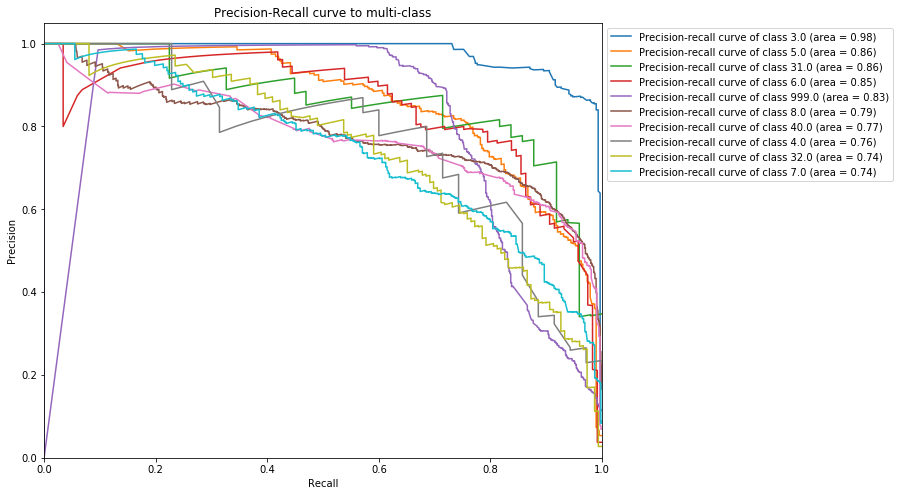

In [33]:
%matplotlib inline
# plot precision recall curve for each class
plt.figure(figsize=(10,8))
# plt.plot(recall["micro"],precision["micro"],
#         label = 'micro-average Precision-recall curve (area = {0:0.2f})'
#                ''.format(average_precision["micro"]))
for i in idx_sort:
    plt.plot(recall[i],precision[i],label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(y_train_class[i], average_precision[i]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Precision-Recall curve to multi-class')
plt.savefig('roc',dpi = 300)

In [34]:
from sklearn.metrics import roc_curve,auc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_class):
    fpr[i],tpr[i],_ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

In [35]:
import operator as op
idx_sort_auc = sorted(roc_auc.items(),key=op.itemgetter(1))[::-1]

In [36]:
idx_sort = []
for i in range(10):
    idx_sort.append(idx_sort_auc[i][0])

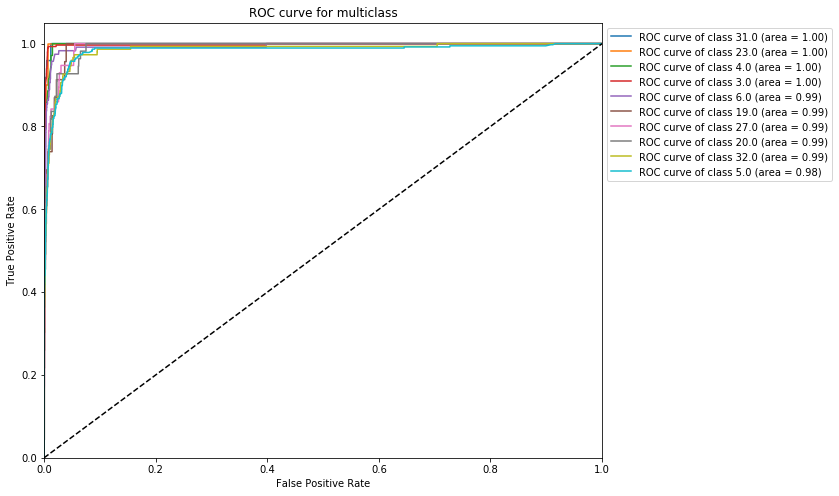

In [38]:
import matplotlib.pyplot 

plt.figure(figsize=(10,8))
for i in idx_sort:
    plt.plot(fpr[i],tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(y_train_class[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multiclass')
plt.legend(bbox_to_anchor=(1, 1))